In [1]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 


In [2]:
# Loading the data
df = pd.read_csv("../input/pandemic/covid19_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3008 non-null   float64
 1   Admin2          3011 non-null   object 
 2   Province_State  3255 non-null   object 
 3   Country_Region  3436 non-null   object 
 4   Last_Update     3436 non-null   object 
 5   Lat             3365 non-null   float64
 6   Long_           3365 non-null   float64
 7   Confirmed       3436 non-null   int64  
 8   Deaths          3436 non-null   int64  
 9   Recovered       3436 non-null   int64  
 10  Active          3436 non-null   int64  
 11  Combined_Key    3436 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 322.2+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-26 02:32:35,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-26 02:32:35,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-26 02:32:35,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-26 02:32:35,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-26 02:32:35,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"


In [3]:
# Preprocessing data
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,299,18,0,281
2,US,37.767072,-75.632346,731,11,0,720
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,8,0,0,8


In [4]:
world = df.groupby(["Country"])[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
world.head()

,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,11180,9857,1097,223
1,Albania,1004,177,795,32
2,Algeria,8503,3147,4747,609
3,Andorra,763,49,663,51
4,Angola,70,48,18,4


In [5]:
#import warnings
#warnings.filterwarnings("ignore")

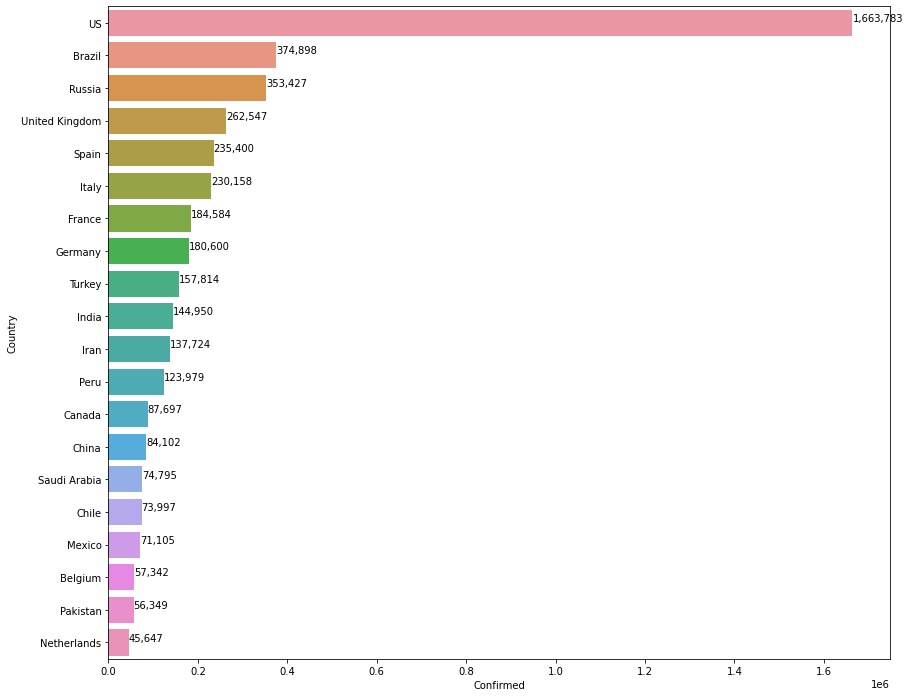

In [6]:
# Plotting top 20 countries
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

# creating a Barplot
plt.figure(figsize=(14,12))
plot = sns.barplot(x= top_20['Confirmed'],y= top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

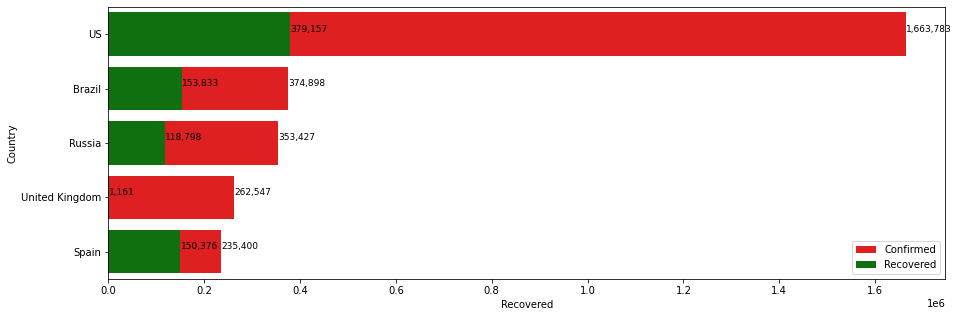

In [7]:
# Plotting Confirmed & Active cases for top 5 countries
top_5 = world.sort_values(by=['Confirmed'], ascending=0).head()
# creating Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(x=top_5['Confirmed'], y=top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(x=top_5['Recovered'], y=top_5['Country'], color = 'green', label='Recovered')
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()


In [8]:
#Choropleth World Map
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Confirmed', hover_name='Country', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()
